In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data

In [2]:
df = pd.read_csv('./data.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Some information and statistics about the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


A weird thing is Glucose, BloodPressure, SkinThickness, Insulin and BMI has minimum value as 0. Which seems an outlier. 

## Checking for duplicate columns and null values in the dataset, if any

In [5]:
df[df.duplicated()].any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [6]:
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

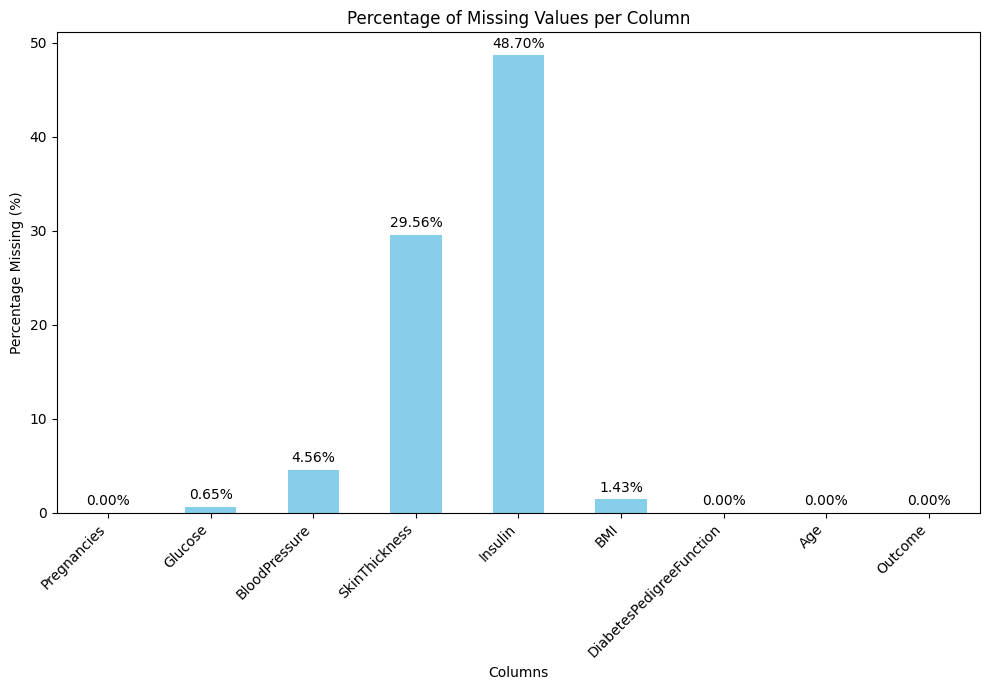

In [7]:
missing_values = df.isnull().mean() * 100  # Calculate the percentage of missing values

# Create a bar plot
plt.figure(figsize=(10, 7))
bars = missing_values.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage Missing (%)')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its value
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 0.5,  # Adjust the position for text
             f'{bar.get_height():.2f}%', 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [8]:
columns_with_missing = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Fill missing values with the median based on 'Outcome'
for column in columns_with_missing:
    df[column] = df.groupby('Outcome')[column].transform(lambda x: x.fillna(x.median()))

# Verify if missing values are filled
missing_after_imputation = df[columns_with_missing].isnull().sum()
print("Missing values after imputation:")
print(missing_after_imputation)

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [18]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Visualization

In [9]:
df_copy = df.copy()

In [10]:
print(df_copy.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


### Correlation Matrix

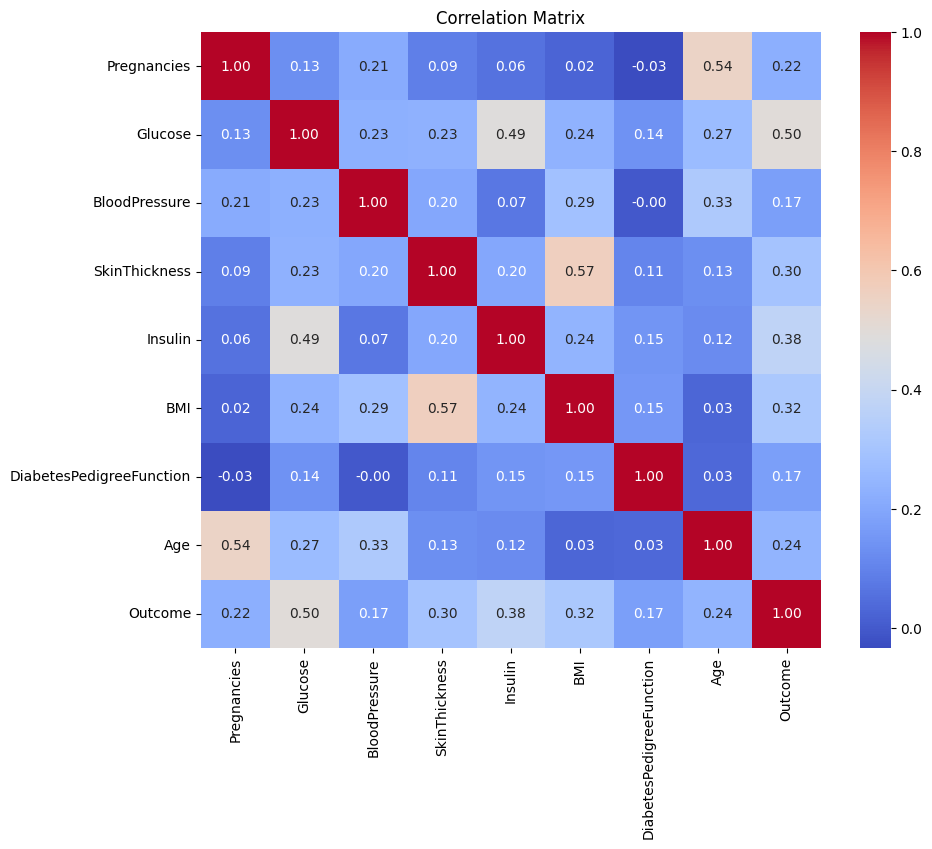

In [11]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))  # Set the size of the plot

# Using seaborn to plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Pairplots

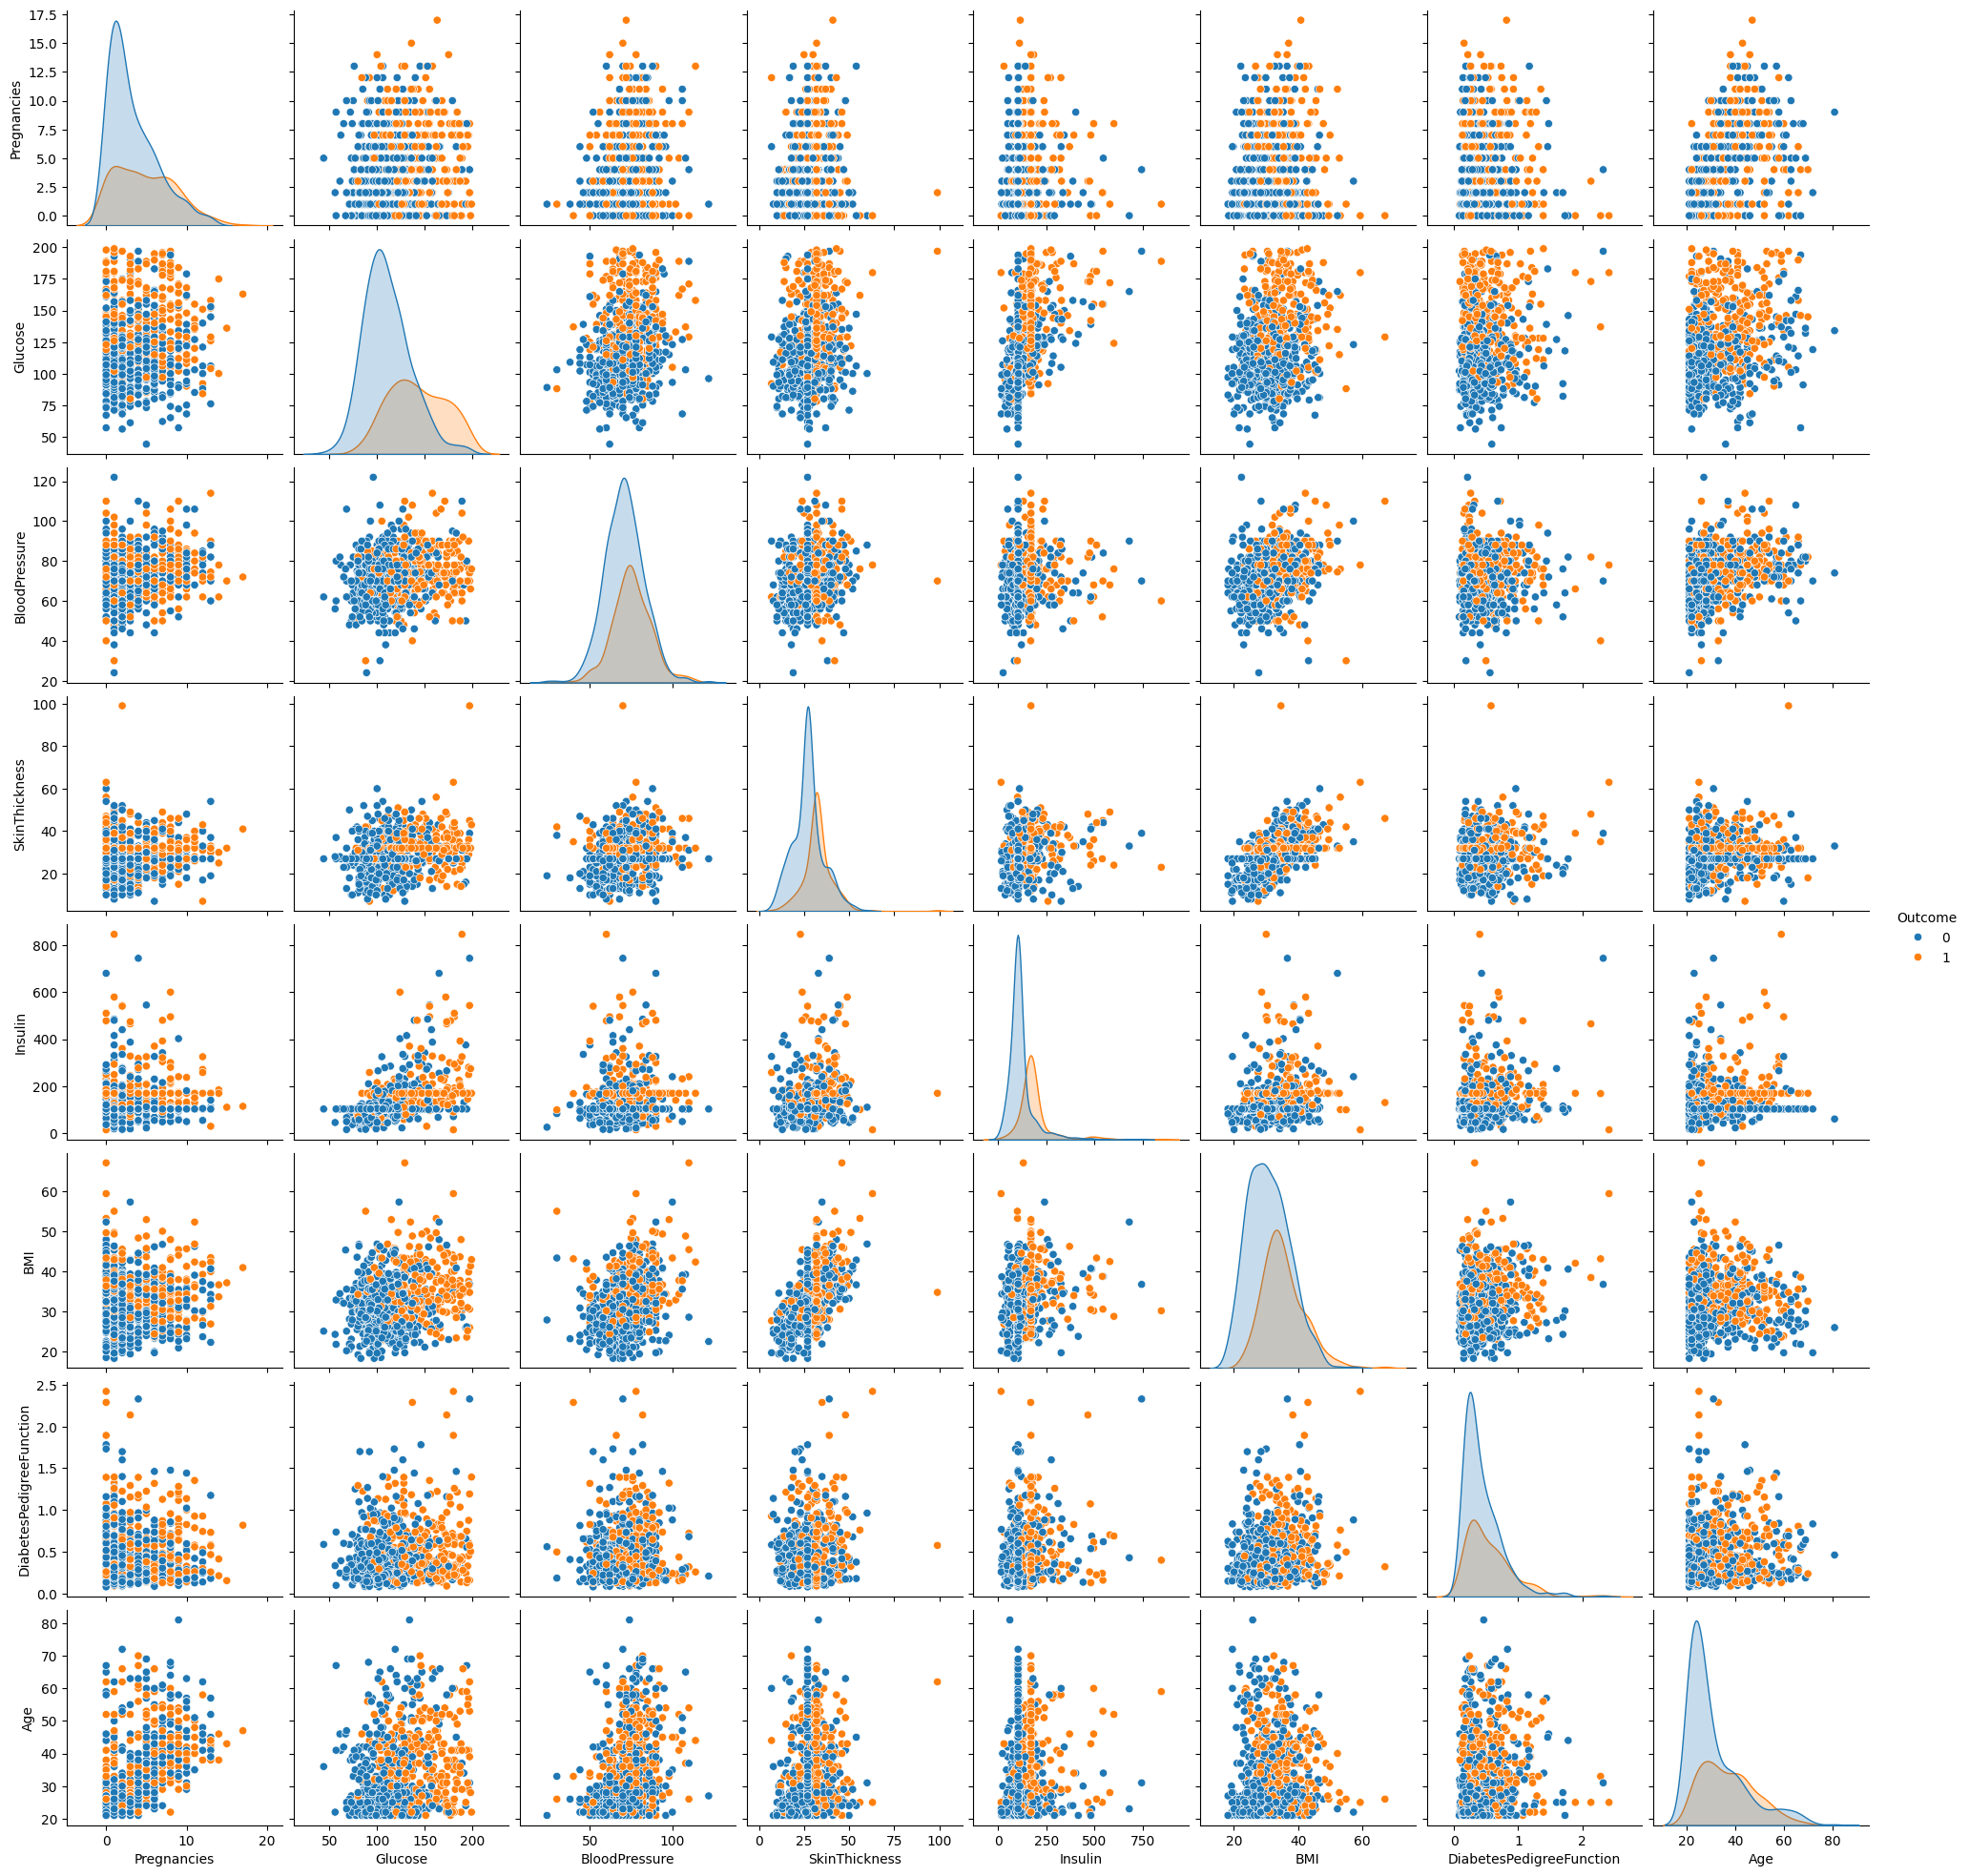

In [12]:
sns.pairplot(df, hue = 'Outcome')

In [13]:
target_mapper = {0: 'Healthy', 1: 'Diabetic'}
df_copy['Outcome'] = df_copy['Outcome'].map(target_mapper)

### Attribute wise plot visualisation

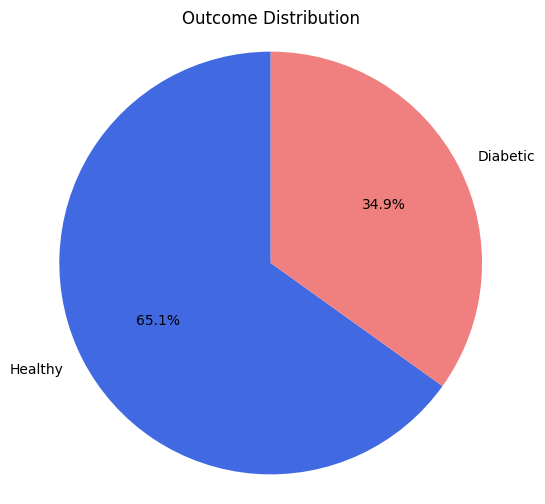

In [14]:
outcome_counts = df_copy['Outcome'].value_counts()

plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%', startangle=90, colors=['royalblue', 'lightcoral'])
plt.title('Outcome Distribution')
plt.axis('equal')
plt.show()

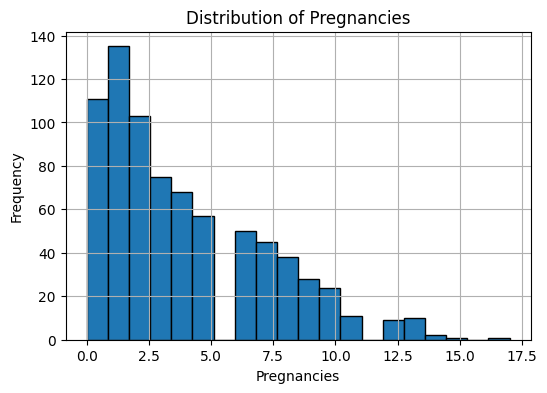

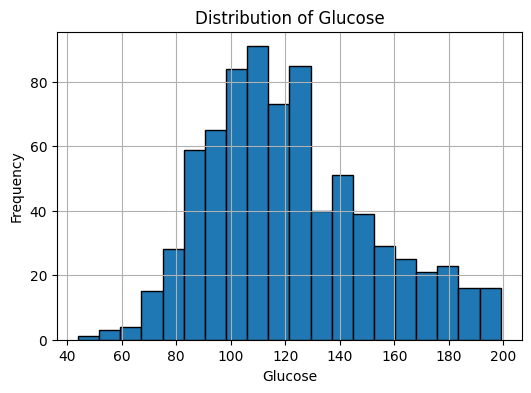

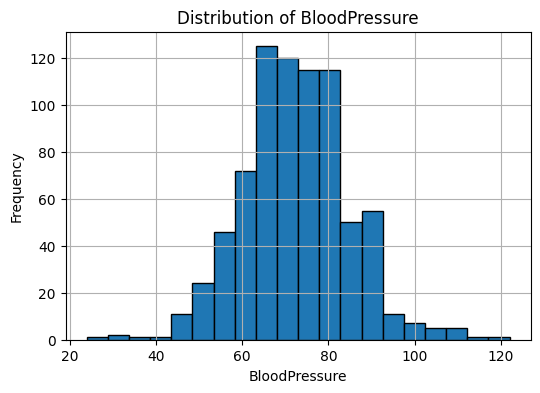

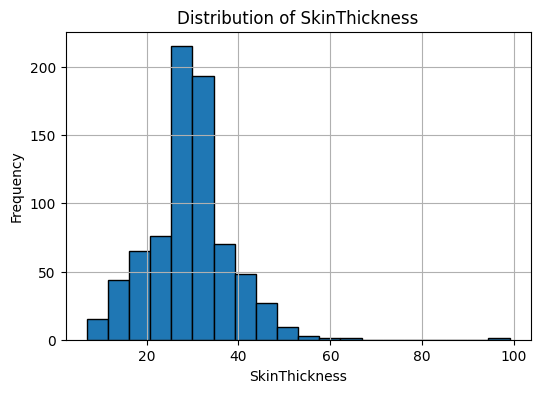

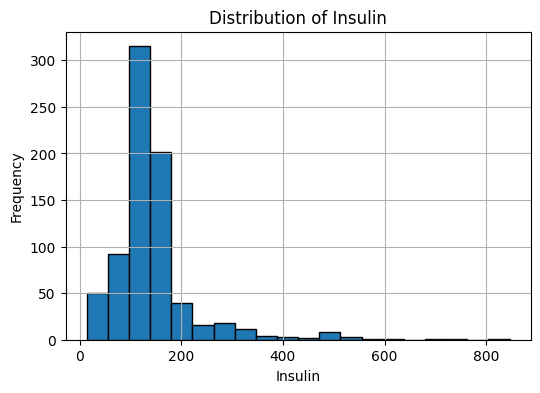

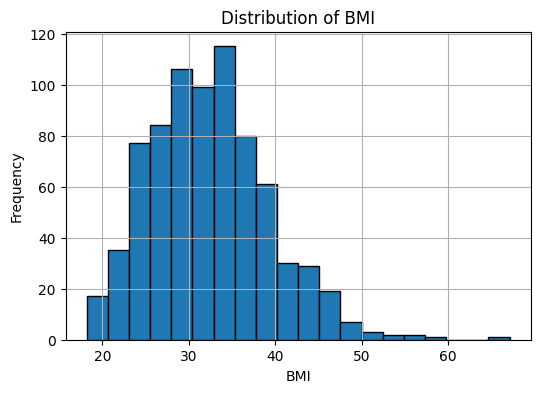

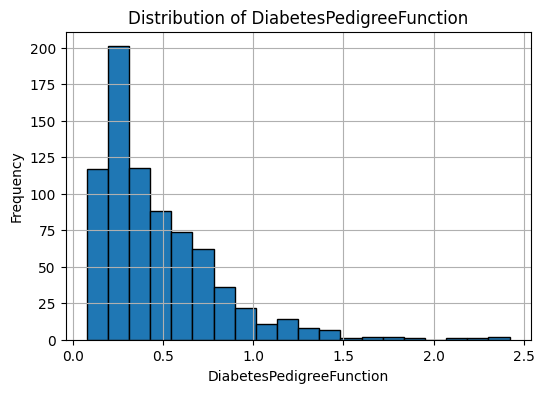

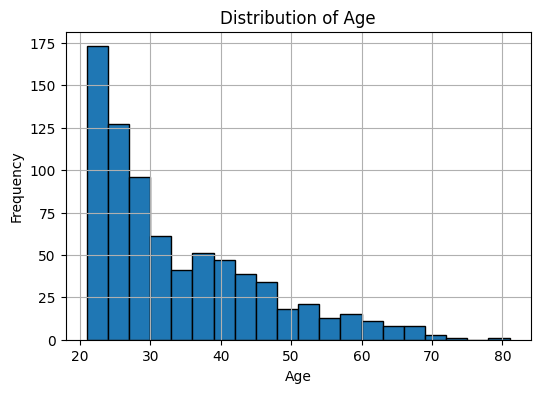

In [15]:
columns_to_plot = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=20, edgecolor='black')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

### Boxplot to show the distributions in various quartile ranges

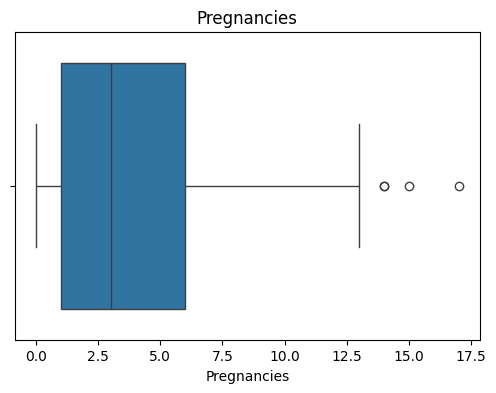

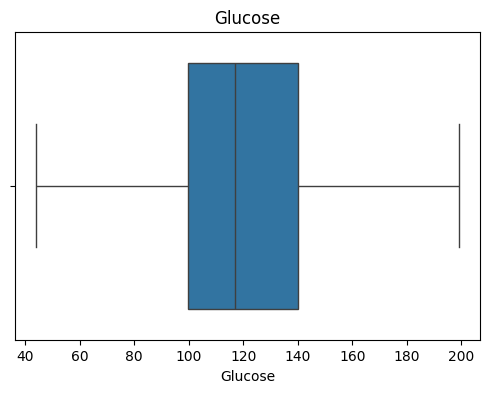

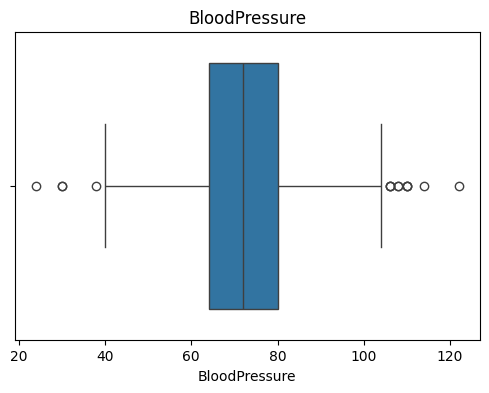

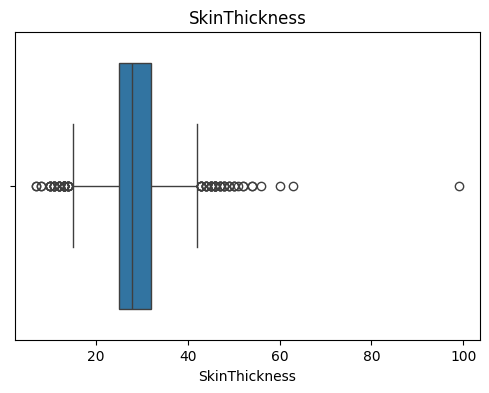

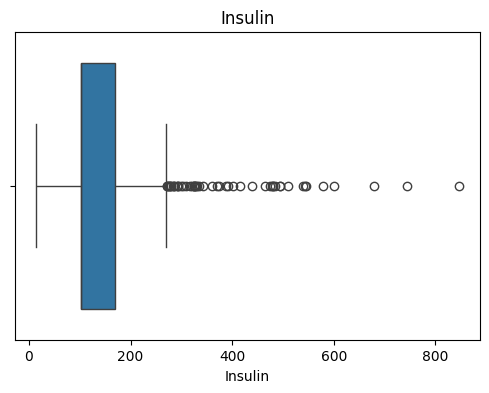

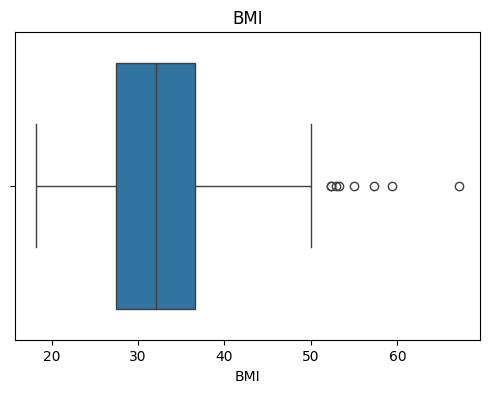

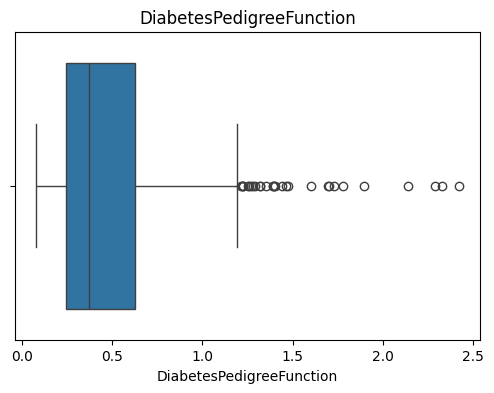

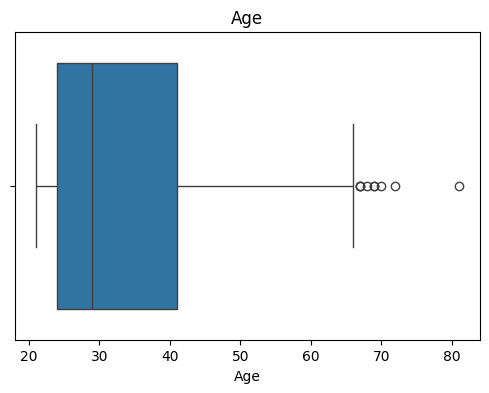

In [16]:
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.show()


### Violin Plots with Kernel Density Estimation

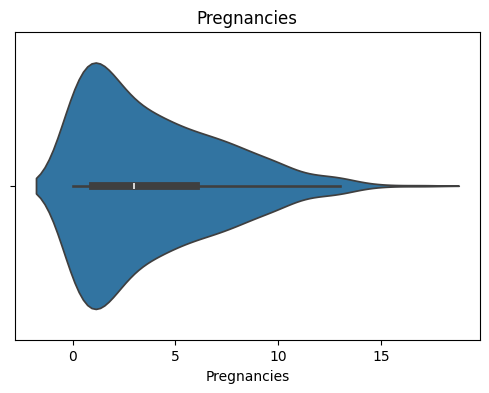

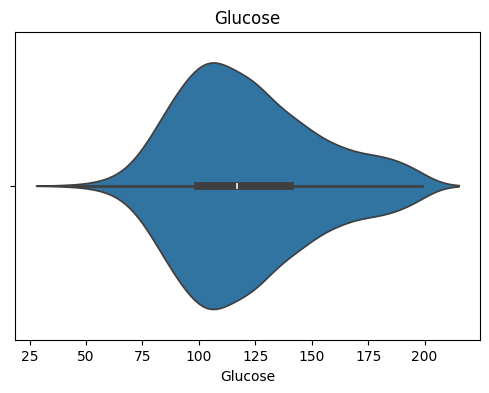

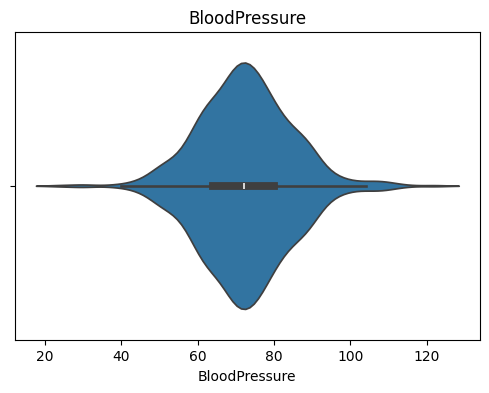

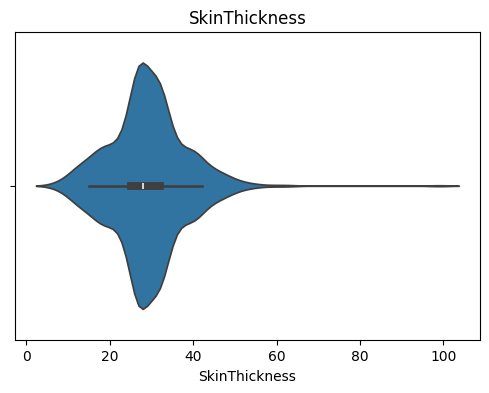

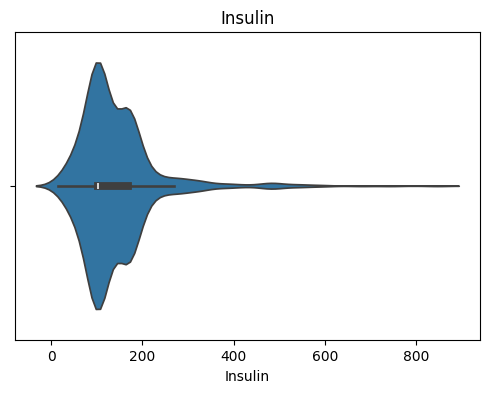

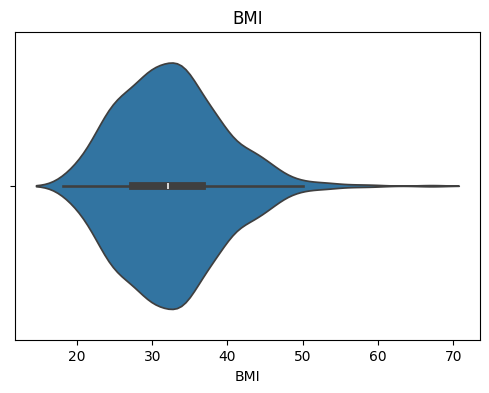

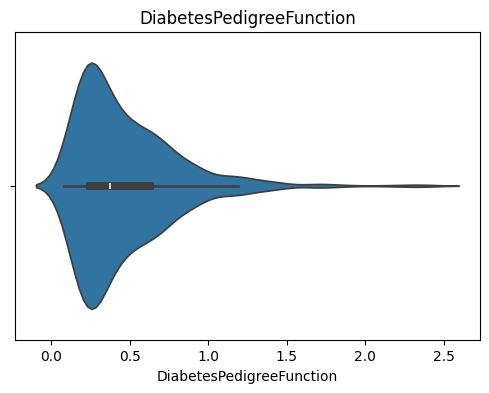

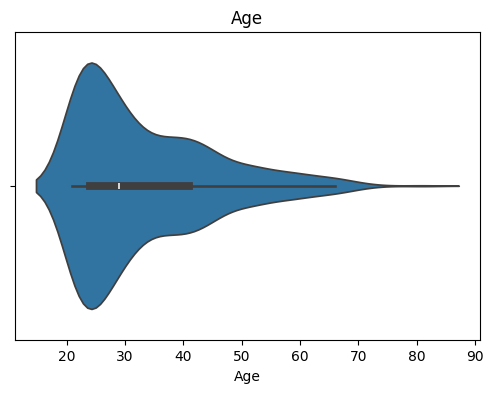

In [17]:
for column in columns_to_plot:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x=df[column])
    plt.title(f'{column}')
    plt.xlabel(column)
    plt.show()
